In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../../')

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd


import transformer_anatomy
from transformer_anatomy.utils import get_results

plt_cmap = 'plasma'# 'viridis'
subtask_order = ['Length', 'Depth', 'SubjNumber', 'CoordinationInversion', 'BigramShift', 'OddManOut']
dir_path = '../../results/linear_head_wise_results'
img_save_path = '../../imgs'

         acc  head  layer                   task                   model_name  \
12960  81.19     0      0                 Length  electra-large-discriminator   
12961  67.58     1      0                 Length  electra-large-discriminator   
12962  57.40     2      0                 Length  electra-large-discriminator   
12963  60.23     3      0                 Length  electra-large-discriminator   
12964  71.08     4      0                 Length  electra-large-discriminator   
...      ...   ...    ...                    ...                          ...   
12955  56.75     3     10  CoordinationInversion  electra-small-discriminator   
12956  59.64     0     11  CoordinationInversion  electra-small-discriminator   
12957  60.80     1     11  CoordinationInversion  electra-small-discriminator   
12958  57.14     2     11  CoordinationInversion  electra-small-discriminator   
12959  56.28     3     11  CoordinationInversion  electra-small-discriminator   

      location  devacc  
12

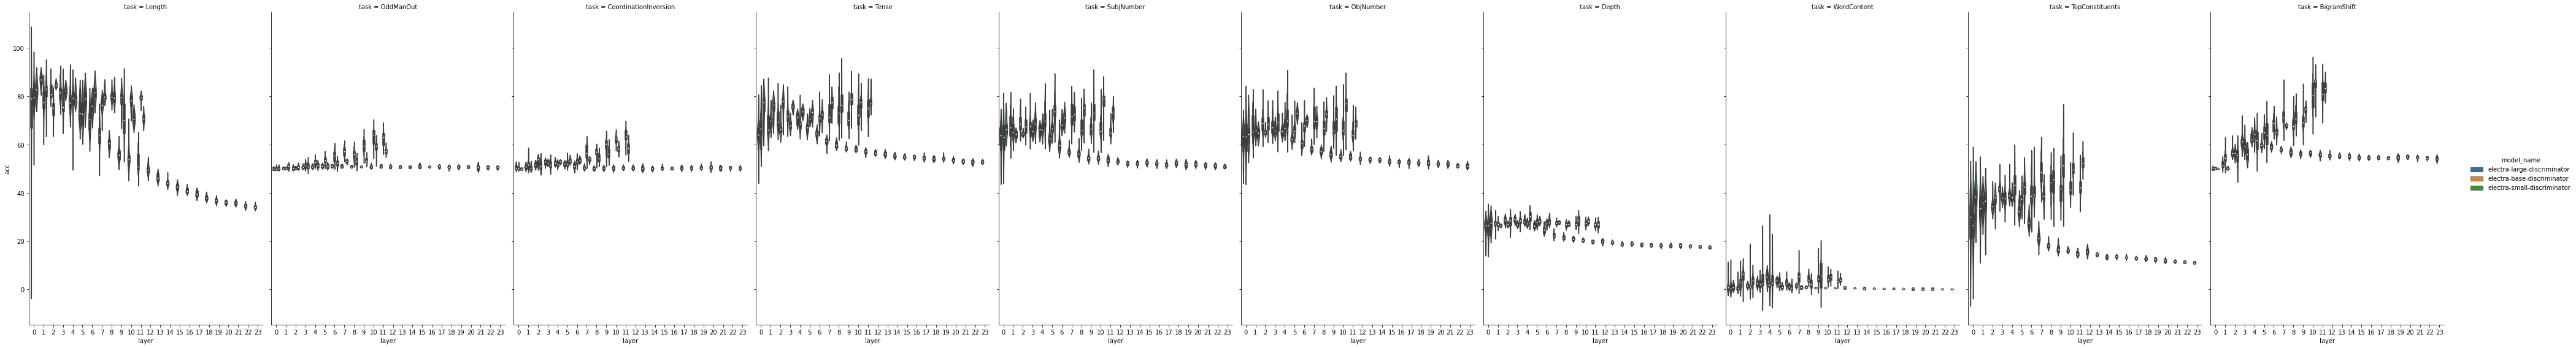

In [11]:
df1 = get_results(dir_path=dir_path, part='head', model_name='electra-large-discriminator')
df2 = get_results(dir_path=dir_path, part='head', model_name='electra-base-discriminator')
df3 = get_results(dir_path=dir_path, part='head', model_name='electra-small-discriminator')
df3 = get_results(dir_path=dir_path, part='head', model_name='electra-small-discriminator')


pair_df = pd.concat([df1, df2, df3])

pair_df = pair_df.loc[pair_df['model_name'] != 'transfo-xl-wt103']
pair_df = pair_df.loc[pair_df['task'] != 'STSBenchmark']
pair_df = pair_df.loc[pair_df['task'] != 'SST2']
pair_df = pair_df.loc[pair_df['task'] != 'MRPC']

print(pair_df)
g = sns.catplot(x="layer", y="acc",
                col="task", hue='model_name',
                data=pair_df, kind="violin",
                height=8, aspect=.7);